In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [135]:
df = pd.read_csv('citrus.csv')
df.shape

(10000, 6)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [137]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [138]:
df.duplicated().sum()##이건 모하는 거에요

0

In [139]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diameter,10000.0,9.975685,1.947844,2.96,8.46,9.980,11.4800,16.45
weight,10000.0,175.050792,29.212119,86.76,152.22,174.985,197.7225,261.51
red,10000.0,153.847800,10.432954,115.00,147.00,154.000,161.0000,192.00
green,10000.0,76.010600,11.708433,31.00,68.00,76.000,84.0000,116.00
blue,10000.0,11.363200,9.061275,2.00,2.00,10.000,17.0000,56.00


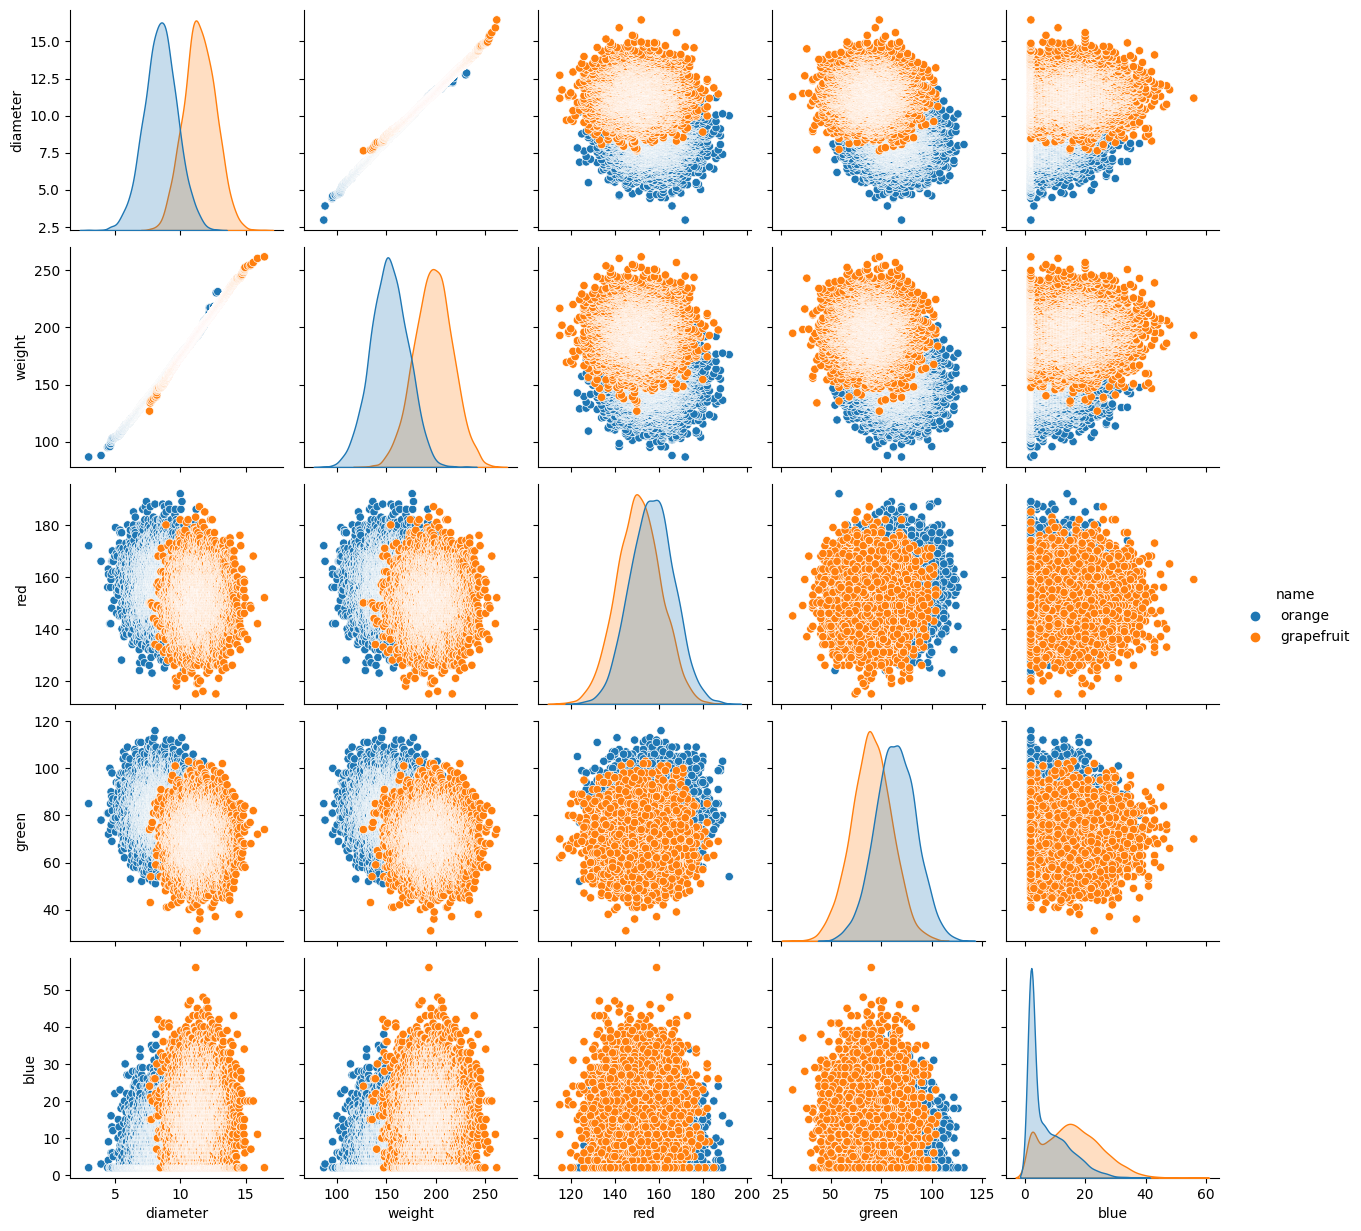

In [140]:
sns.pairplot(df,hue='name')
#겹치는 부분이 많다.
#그러니 이 기준으로는 학습을 잘 시켜도 잘 구분되지 않을 확률이 높다.

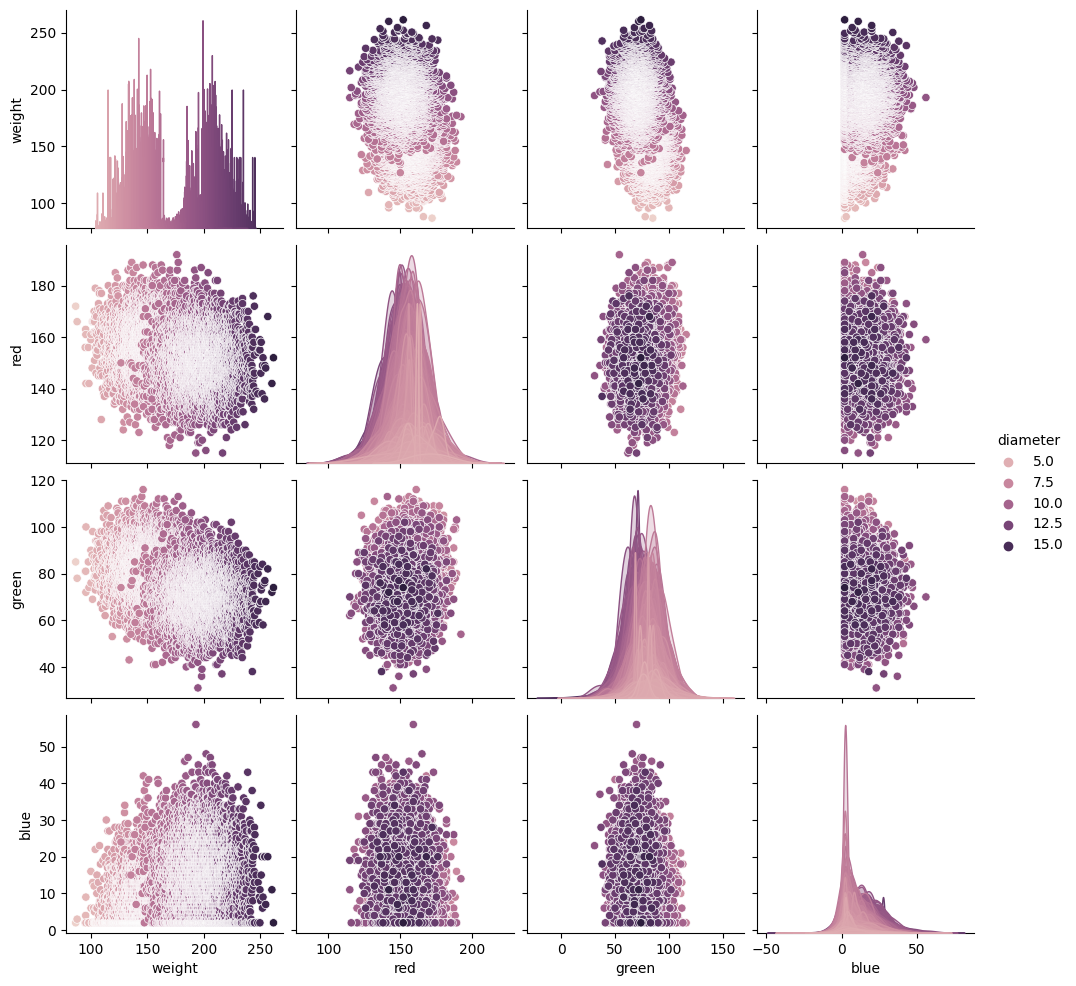

In [141]:
sns.pairplot(df,hue='diameter')

In [142]:
df = df.copy()

In [143]:
df['name'] = df['name'].map({
    'orange': 0,
    'grapefruit':1
})

In [144]:
X = df.drop('name', axis = 1)
y = df['name']

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
# Shuffle 한 이후의 X_train, X_test, y_train, y_test와 같은 형태로 리턴
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=2022)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 5) (2000, 5) (8000,) (2000,)


In [147]:
y_train.value_counts()

0    4021
1    3979
Name: name, dtype: int64

### 표준화

In [148]:
X_train.head()

,diameter,weight,red,green,blue
5516,9.92,173.01,146,89,5
1255,7.66,140.21,147,96,2
4319,9.84,173.84,170,91,17
9372,12.90,219.25,170,83,20
1723,7.98,145.36,143,88,10


In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()
scaler.fit(X_train)
#이건 왜?하는거에요
#분산하고 구하는거고

X_train_s = scaler.transform(X_train)
#트랜스폼이 나눠주고 뺴주고 넘파이로 바꾸는거까지
#넘파이타입으로 변경시켜준다.
type(X_train_s), type(X_train)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [151]:
pd.DataFrame(X_train_s)

,0,1,2,3,4
0,-0.021930,-0.063100,-0.749613,1.100194,-0.708759
1,-1.178060,-1.182231,-0.654226,1.697262,-1.041192
2,-0.062855,-0.034780,1.539682,1.270785,0.620970
3,1.502525,1.514603,1.539682,0.588421,0.953402
4,-1.014360,-1.006514,-1.035775,1.014899,-0.154706
...,...,...,...,...,...
7995,0.407782,0.375000,-0.940388,0.161944,1.064213
7996,0.269660,0.256604,1.635069,0.503126,-1.041192
7997,-1.945403,-1.921268,0.871971,1.100194,-1.041192
7998,-1.183176,-1.186667,-0.558838,1.100194,-1.041192


In [152]:
y_train_s = y_train.values

### 학습

In [153]:
scaler.mean_, scaler.var_
# mean 이랑 var 이 계산되어 있는지 확인해보낟.

(array([  9.96286875, 174.85934875, 153.858625  ,  76.101375  ,
         11.396125  ]),
 array([  3.82123223, 858.98450121, 109.90538811, 137.45109811,
         81.43970998]))

In [154]:
X_test_s = scaler.transform(X_test)# 왜 다르게 하는거에요
y_test_s = y_test.values

In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
scores = []
for i in range(3, 30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_s, y_train_s)
    score = clf.score(X_train_s, y_train_s)
    scores.append(score)
scores

[0.94975,
 0.94075,
 0.941125,
 0.9365,
 0.93575,
 0.933125,
 0.934625,
 0.932125,
 0.93425,
 0.930875,
 0.931,
 0.929875,
 0.931,
 0.9315,
 0.930375,
 0.93025,
 0.92925,
 0.929875,
 0.92975,
 0.93075,
 0.929875,
 0.9295,
 0.929375,
 0.929625,
 0.929875,
 0.92975,
 0.92975]

### Best
- k=5

In [164]:
score = clf.score(X_train_s, y_train_s)
print('accuracy : ', score)

accuracy :  0.92975


# 최종테스트

In [165]:
y_pred = clf.predict(X_test_s)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [166]:
#평가지표 metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    
    print('accuracy:', acc)
    print('precision:', pre)
    print('recall:', rec)

In [167]:
print_score(y_test, y_pred)

accuracy: 0.926
precision: 0.9292035398230089
recall: 0.9255631733594515


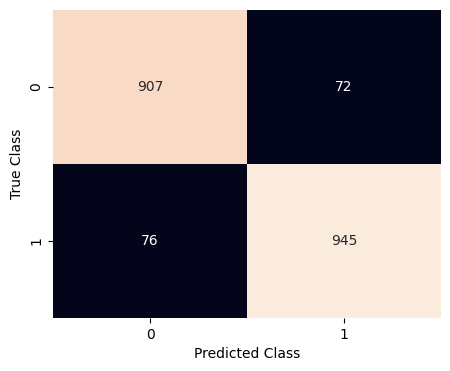

In [168]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cfm, fmt='',annot =True, cbar = False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()